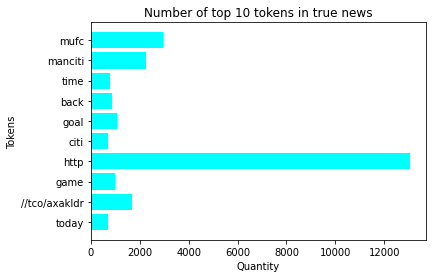

+----+---------------+------------+
|    | titles        |   quantity |
|----+---------------+------------|
|  0 | today         |        697 |
|  1 | //tco/axakldr |       1687 |
|  2 | game          |        990 |
|  3 | http          |      13045 |
|  4 | citi          |        708 |
|  5 | goal          |       1050 |
|  6 | back          |        862 |
|  7 | time          |        793 |
|  8 | manciti       |       2245 |
|  9 | mufc          |       2941 |
+----+---------------+------------+


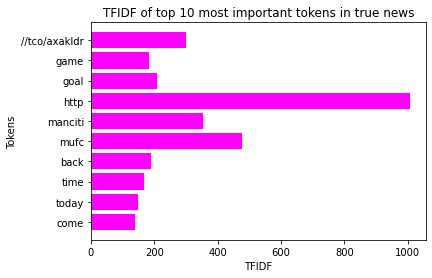

+----+---------------+----------+
|    | titles        |    TFIDF |
|----+---------------+----------|
|  0 | come          |  137.62  |
|  1 | today         |  147.241 |
|  2 | time          |  167.224 |
|  3 | back          |  189.948 |
|  4 | mufc          |  476.635 |
|  5 | manciti       |  354.954 |
|  6 | http          | 1006.41  |
|  7 | goal          |  208.146 |
|  8 | game          |  182.024 |
|  9 | //tco/axakldr |  300.772 |
+----+---------------+----------+


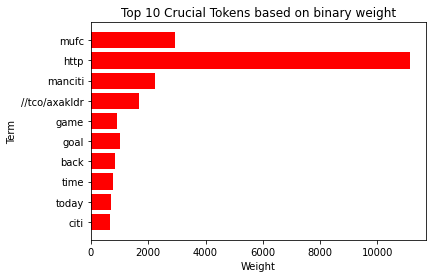

+----+---------------+----------+
|    | term          |   weight |
|----+---------------+----------|
|  0 | citi          |      661 |
|  1 | today         |      686 |
|  2 | time          |      763 |
|  3 | back          |      835 |
|  4 | goal          |      997 |
|  5 | game          |      901 |
|  6 | //tco/axakldr |     1687 |
|  7 | manciti       |     2232 |
|  8 | http          |    11131 |
|  9 | mufc          |     2936 |
+----+---------------+----------+


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from services.text_tokenizer import text_tokenizer
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('./data/test.csv', usecols=['full_tweet'], delimiter=',')
sample = dataset['full_tweet']

vectorizer = CountVectorizer(tokenizer=text_tokenizer)
vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)

X_transform_sample = vectorizer.fit_transform(sample)
X_transform_sample_tf = vectorizer_tf.fit_transform(sample)
titles = (vectorizer.get_feature_names_out())
array = X_transform_sample.toarray()
array_tf = X_transform_sample_tf.toarray()

"""
Display top 10 tokens
"""

column_sum = np.sum(array, axis=0)
max_val_col = np.argpartition(column_sum, -10)[-10:]
top_10 = column_sum[max_val_col]

"""
Display top 10 documents
"""

row_sum = np.sum(array, axis=1)
max_val_row = np.argpartition(row_sum, -10)[-10:]
top_10_docs = row_sum[max_val_row]

"""
Display top 10 most important tokens
"""

tf_col_sum = np.sum(array_tf, axis=0)
max_tf_val_col = np.argpartition(tf_col_sum, -10)[-10:]
top_10_tf = tf_col_sum[max_tf_val_col]

''' Bar plot of quantity top 10 tokens in true news '''

top_10_tokens = titles[np.argpartition(column_sum, -10)[-10:]]
top_10_quantity = column_sum[max_val_col]

plt.barh(top_10_tokens, top_10_quantity, color='cyan')
plt.title('Number of top 10 tokens in true news')
plt.xlabel('Quantity')
plt.ylabel('Tokens')
plt.savefig('./images/quantity.png')
plt.show()

''' Pretty table '''

df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})

top_10_tf_tokens = titles[np.argpartition(tf_col_sum, -10)[-10:]]
top_10_tf_quantity = tf_col_sum[max_tf_val_col]
print(tabulate(df_1, headers='keys', tablefmt='psql'))

''' Bar plot of TF-IDF indexes top 10 most important tokens in true news'''

plt.barh(top_10_tf_tokens, top_10_tf_quantity, color='magenta')
plt.title('TFIDF of top 10 most important tokens in true news')
plt.xlabel('TFIDF')
plt.ylabel('Tokens')
plt.savefig('./images/tf-idf.png')
plt.show()

''' Pretty table '''

df_2 = pd.DataFrame({'titles': top_10_tf_tokens, 'TFIDF': top_10_tf_quantity})
print(tabulate(df_2, headers='keys', tablefmt='psql'))

'''Binary weight'''

vectorizer_bw = CountVectorizer(tokenizer=text_tokenizer, binary=True)
X_transform_bw_sample = vectorizer_bw.fit_transform(sample)
titles_bw = (vectorizer_bw.get_feature_names_out())
array_bw = X_transform_bw_sample.toarray()

column_sum_bw = np.sum(array_bw, axis=0)
max_val_col_bw = np.argpartition(column_sum_bw, -10)[-10:]
top_10_bw = column_sum_bw[max_val_col_bw]

top_10_bw_terms = titles_bw[np.argpartition(column_sum_bw, -10)[-10:]]

plt.barh(top_10_bw_terms, top_10_bw, color='red')
plt.title('Top 10 Crucial Tokens based on binary weight')
plt.xlabel('Weight')
plt.ylabel('Term')
plt.savefig('./images/tf-binary-weight.png')
plt.show()

''' Pretty table '''

df_3 = pd.DataFrame({'term': top_10_bw_terms, 'weight': top_10_bw})
print(tabulate(df_3, headers='keys', tablefmt='psql'))

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import text_function as tfun
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Arsenal = pd.read_csv('./data/Arsenal.csv', usecols=['created_at','full_tweet'])
Arsenal['team'] = 'Arsenal'

Chelsea = pd.read_csv('./data/ChelseaFC.csv', usecols=['created_at','full_tweet'])
Chelsea['team'] = 'Chelsea'

Liverpool = pd.read_csv('./data/LCFC.csv', usecols=['created_at','full_tweet'])
Liverpool['team'] = 'Liverpool'

ManCity = pd.read_csv('./data/ManCity.csv', usecols=['created_at','full_tweet'])
ManCity['team'] = 'Manchester City'

ManUtd= pd.read_csv('./data/ManUtd.csv', usecols=['created_at','full_tweet'])
ManUtd['team'] = 'Manchester United'

tweets = pd.concat([Arsenal, Chelsea, Liverpool, ManCity, ManUtd])

tweets.tail(2500)

# tweets.to_csv(path_or_buf='./data/test.csv')
# sample = dataset['full_tweet']

X = tweets['full_tweet']
y = tweets['team']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

vectorizer = CountVectorizer(tokenizer=tfun.text_tokenizer)
X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

tree = DecisionTreeClassifier()
tree = tree.fit(X_train_transform, Y_train)
print("Dokładność w zestawie uczącym drzewo decyzyjne: {:.3f}".format(tree.score(X_train_transform, Y_train)))
print("Dokładność w zestawie testowym drzewo decyzyjne: {:.3f}".format(tree.score(X_test_transform, Y_test)))


Dokładność w zestawie uczącym drzewo decyzyjne: 0.999
Dokładność w zestawie testowym drzewo decyzyjne: 0.845
